# Kelly Criterion for Portfolio Optimisation

## Table of Content
- Introduction
- Kelly Criterion for Single Bets
- Kelly Criterion for Multiple Bets
- Portfolio Optimisation with Single Assets
- Portfolio Optimisation with Multiple Assets
- Conclusion

## Introduction

Portfolio optimisation is the process of optimising a profolio according to a given metric or objective. Typical objectives include expected return, volatility, maximum drawdown or combinations of these. In this document I will summarise the use of the Kelly Criterion as a means of optimising long term wealth in a portfolio. 

## Kelly Criterion for Single Bets

### Derivation  
Suppose there was a site offering a bet with $b:1$ odds with probability $p$ of success, and probability q of failure, and we are allowed to bet infinitely many times on it.  
Given that we start with a set amount of money, we can choose what proportion $c$ of our wealth to bet on it.  
Now suppose at bet $t$ we bet a proportion $c_t$ of our current wealth $W_t$.  
We define $w_t$ as the proportional gain in wealth from $t-1$ to $t$.
We aim to maximise the expected logarithm of wealth after bet $t$:  

$\mathbb{E}[\log(W_t)]=\mathbb{E}[\log(w_tW_{t-1})]=\mathbb{E}[\log(w_t)+\log(W_{t-1})]=\mathbb{E}[\log(w_t)]+\mathbb{E}[\log(W_{t-1})]$  
Thus $\mathbb{E}[\log(W_t)]=\mathbb{E}[\log(W_0)]+\sum_{i=1}^t\mathbb{E}[\log(w_i)]$

Since $\mathbb{E}[\log(w_i)]$ can be optimised separately, we only need to consider optimising these to optimise log wealth:

$\mathbb{E}[\log(w_t)] = p\log(1-c+c(1+b))+q\log(1-c) = p\log(1+c_tb)+q\log(1-c_t)$

For ease of notation define $w(c) := p\log(1+cb)+q\log(1-c)$.  
We look to find $\max_{c \in \mathbb{R}}w(c)$: 

$w'(c)=\frac{pb}{1+bc}-\frac{q}{1-c} = 0$  
$pb-pbc=q+bc-pbc$  
$c_{max}=\frac{pb-q}{b}$  
$w''(c)=\frac{-pb^2}{(1+bc)^2}-\frac{q}{(1-c)^2}$  
$w''(c_{max})=\frac{b^2}{(b+1)^2(p-1)p} < 0$, $p \in (0, 1)$

The Kelly Criterion is defined as the optimal proportion, $c_{max}=\frac{pb-q}{b}$.  
Thus to maximise expected log wealth, set $c_t = \frac{pb-q}{b}$

### Consequences
This result has some very intuititve consequences:
- $p = \frac{1}{2}, b = 1, c_{max} = 0$  
  - On a fair coin toss with 1:1 odds, the bet shouldn't be taken, because the expected gain at each turn is 0 no matter the proportion bet.
- $p = 1, b > 0, c_{max} = 1$
  - The whole bankroll should be bet when a guaranteed profit can be made
- $p = \frac{1}{b+1}, c_{max} = 0$
  - Intuitively, the expected return is 1, so the better can gain no edge, so the bet isn't worth it.
- $p = \frac{2}{5}, b=1, c_{max} = -\frac{1}{5}$
  - Intuitively, when the expected return is below 1, the better should bet against the bet if possible. In this case, it is optimal to bet 20% of your bankroll against the odds.

### Extensions
Now suppose instead that in the bet, a bet of \$$1$ returns \$$(1+b)$ with probability $p$ and returns \$$(1-a)$ with probability $q$.  
With similar reasoning to above, we must maximise $w(c) := p\log(1+cb)+q\log(1-ac)$.  
$w'(c)=\frac{pb}{1+bc}-\frac{qa}{1-ac}=0$  
$c_{max}=\frac{p}{a}-\frac{q}{b}$  
This proportion is intuitively correct, as it suggests not playing when the expected return is $0$, when $pb=qa$, and the proportion increases (decreases) as the expected return, $pb-qa$, increases (decreases).

### Demonstration
I shall now demonstrate the optimality of the Kelly Criterion for a variety of odds:

In [1]:
import random
import warnings

import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm

In [2]:
def KellyTest(p, b, trials):
    # sets test proportions
    cs = [0,0.05,0.1,0.2,0.4,0.6,0.8]

    # gets kelly bet
    kelly = (p*(b+1)-1)/b
    print("Kelly Criterion: {:.2f}".format(kelly))

    # generates random trial
    wins = np.random.binomial(1,p,trials)

    # calculates wealth of betters
    wealths = [np.insert(np.cumprod((1-c)+c*(b+1)*wins),0,[1]) for c in cs]
    
    
    # plots wealth profiles
    plt.figure(figsize=(10,6))
    
    for wealth in wealths:
        plt.plot(np.log(wealth))
    
    plt.title("Log Wealth Profile of Betting Proportions (p={}, b={})".format(p,b))
    plt.xlabel("Bet No.")
    plt.ylabel("Log-Wealth")
    plt.legend(cs)
    plt.show()

Kelly Criterion: 0.40


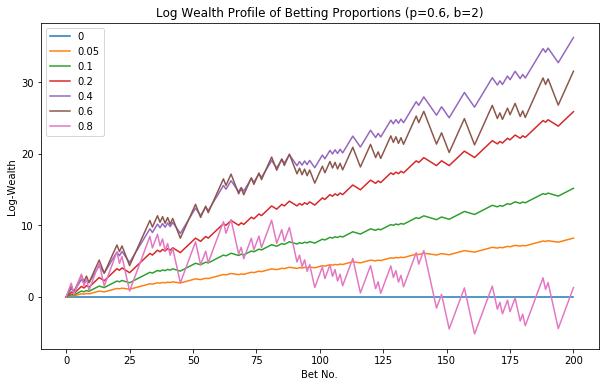

In [3]:
KellyTest(0.6,2,200)

Kelly Criterion: 0.00


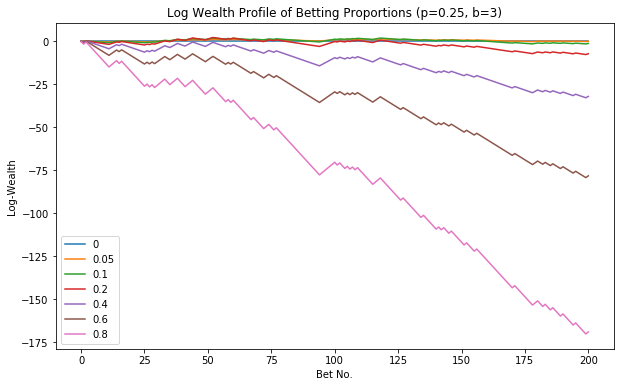

In [4]:
KellyTest(0.25,3,200)

## Kelly Criterion for Multiple Bets

### Derivation  
Suppose now there was a site offering $n$ bets, where betting $\$1$ yields $\$(1+b_i)$ with probability $p_i \in (0,1)$ and yields $\$(1-a_i)$ with probability $(1-p_i)$.
Suppose that on each bet we place a proportion $c_i$ of our bankroll, where $\sum c_i \leq 1, c_i \geq 0$. We represent these proportions as a vector $\vec{c} \in \mathbb{R}^n$, and winnings/losses as vectors $\vec{a}, \vec{b} \in \mathbb{R}^n$.

Then the expected gain in log-wealth is $w(\vec{c})=\sum_{\vec{v} \in \{0,1\}^n}(\prod_{i=1}^n{p_i^{v_i}(1-p_i)^{1-v_i}})\log(1+(\vec{v} \odot \vec{b} - (\vec{1} - \vec{v}) \odot \vec{a}) \cdot \vec{c})$.  
Here we have defined $\vec{u} \odot \vec{v}$ as the elementwise product $(u_1v_1, u_2v_2, ..., u_nv_n)$.

$\frac{\partial w}{\partial c_i}=\sum_{\vec{v} \in \{0,1\}^n}(\prod_{k=1}^n{p_k^{v_k}(1-p_k)^{1-v_k}})\frac{v_ib_i - (1 - v_i)a_i}{1+(\vec{v} \odot \vec{b} - (\vec{1} - \vec{v}) \odot \vec{a}) \cdot \vec{c})}$

$\frac{\partial^2 w}{\partial c_i\partial c_j}=\sum_{\vec{v} \in \{0,1\}^n}(\prod_{i=1}^n{p_i^{v_i}(1-p_i)^{1-v_i}})\frac{-(v_ib_i - (1 - v_i)a_i)(v_jb_j - (1 - v_j)a_j)}{(1+(\vec{v} \odot \vec{b} - (\vec{1} - \vec{v}) \odot \vec{a}) \cdot \vec{c}))^2}$

### Optimisation
These expression can potentially be optimised by gradient descent or Newton's method. Evaluation of the gradient has complexity at least $O(n2^n)$, and calculation of the Hessian have at least complexity $O(n^22^n)$, so both quickly becomes computationally intractable, but Newton's method is cheaper to calculate.  
I will now demonstrate evaluation for $n=2$ and optimisation using a modified version of gradient descent.

In [5]:
# defines the set of every permutation of 1s and 0s of length n
def powerset(n):
    if n <= 0:
        return [[]]
    else:
        return [x+y for x in [[0],[1]] for y in powerset(n-1)]

In [6]:
# defines expected log-wealth of a betting proportion
def log_wealth_func(p: np.array,
                    b: np.array,
                    a: np.array):
    vs = [np.array(v) for v in powerset(len(p))]
    probs = [np.prod((p**v)*((1-p)**(1-v))) for v in vs]
    coeffs = [v*b-(1-v)*a for v in vs]
    
    def log_wealth(c: np.array):
        return sum(probs[i]*np.log(1+np.dot(coeffs[i],c)) for i in range(2**len(c)))
    
    return log_wealth

In [6]:
# defines gradient vector of expected log-wealth of a betting proportion
def grad_func(p: np.array,
              b: np.array,
              a: np.array):
    vs = [np.array(v) for v in powerset(len(p))]
    probs = [np.prod((p**v)*((1-p)**(1-v))) for v in vs]
    coeffs = [v*b-(1-v)*a for v in vs]
    
    def grad(c: np.array):
        return sum(probs[i]*coeffs[i]/(1+np.dot(coeffs[i],c)) for i in range(2**len(c)))
    
    return grad

In [6]:
# defines hessian matrix of expected log-wealth of a betting proportion
def hessian_func(p: np.array,
              b: np.array,
              a: np.array):
    vs = [np.array(v) for v in powerset(len(p))]
    probs = [np.prod((p**v)*((1-p)**(1-v))) for v in vs]
    coeffs = [v*b-(1-v)*a for v in vs]
    
    def grad(c: np.array):
        return -np.matrix(sum((probs[i]/(1+np.dot(coeffs[i],c))**2)*np.outer(coeffs[i],coeffs[i]) for i in range(2**len(c))))
    
    return grad

### Testing
I will be testing on a set of bets with the same expected returns, but one with larger fluctuations in wealth than the other.

In [7]:
# set system parameters
p = np.array([0.75,0.5])
b = np.array([1,2])
a = np.array([1,1])

In [8]:
# sets initial parameters
w = log_wealth_func(p, b, a)
grad = grad_func(p, b, a)
hessian = hessian_func(p, b, a)

alpha = 0.2
max_c = 1
min_c = 0
c = np.array([0.0, 0.0])
epsilon = 10**-2

I will now optimise this function using a modified version of gradient descent:  
Let $f:\mathbb{R}^n \to \mathbb{R}$ be a smooth function.  

By the Taylor Expansion about $\textbf{x}_0$:  
$f(\textbf{x}_0 - \epsilon\textbf{g})\approx f(\textbf{x}_0)-\epsilon\textbf{g}^T\textbf{g}+\frac{1}{2}\epsilon^2\epsilon\textbf{g}^TH\textbf{g}$,  
where $\textbf{g}, H$ are the gradient vector and Hessian matrix at $\textbf{x}_0$.  

Thus, by differentiation, we see that the value of $\epsilon$ that causes the greatest decrease is $\frac{\textbf{g}^T\textbf{g}}{\textbf{g}^TH\textbf{g}}$.  
This value is the scale constant in my code.

In [9]:
points = [list(c)]
print("Log-Wealth after iteration 0: {:.6f}".format(w(c)))

# performs gradient descent to find maximum
for i in range(100):
    g = np.matrix(grad(c))
    
    # calculates the optimal step size
    scale = (g*g.transpose())[0,0]/np.sqrt(epsilon**2+(g*hessian(c)*g.transpose())[0,0]**2)
    
    # performs gradient descent
    c += alpha*grad(c)*scale
    
    # maps result into search space
    for j in range(len(c)):
        if c[j] > max_c:
            c[j] = max_c
        elif c[j] < min_c:
            c[j] = min_c
    
    # records result
    points = points + [list(c)]
    if (i+1)%10 == 0:
        print("Log-Wealth after iteration {}: {:.6f}".format(i+1,w(c)))
        
print("Optimal Proportions:", np.round(c,3))

Log-Wealth after iteration 0: 0.000000
Log-Wealth after iteration 10: 0.173708
Log-Wealth after iteration 20: 0.176045
Log-Wealth after iteration 30: 0.176361
Log-Wealth after iteration 40: 0.176490
Log-Wealth after iteration 50: 0.176560
Log-Wealth after iteration 60: 0.176604
Log-Wealth after iteration 70: 0.176635
Log-Wealth after iteration 80: 0.176658
Log-Wealth after iteration 90: 0.176675
Log-Wealth after iteration 100: 0.176688
Optimal Proportions: [ 0.445  0.21 ]


We shall now plot a profile of $w$ over $(x,y) \in [0,1]^2$.

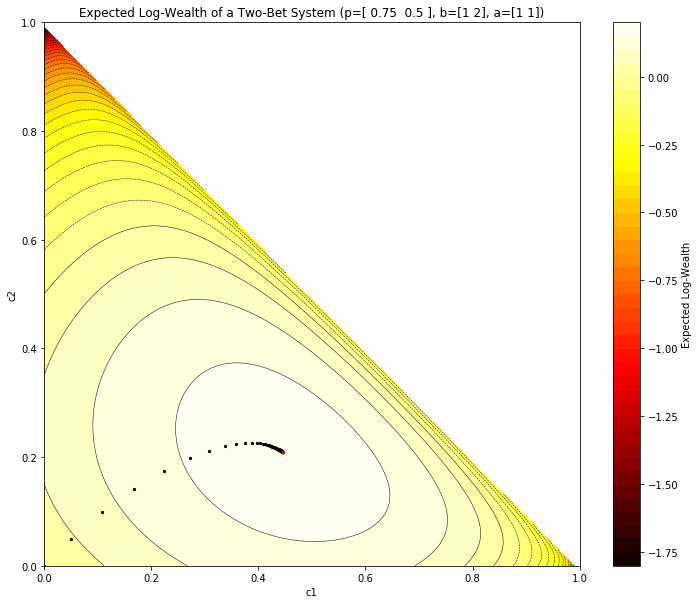

In [10]:
warnings.filterwarnings('ignore')

def fun(x, y):
  return w([x,y])

# evaluates log-wealth
fig = plt.figure(figsize=(12,10))
x = y = np.linspace(0, 1, 100)
X, Y = np.meshgrid(x, y)
zs = np.array([fun(x,y) for x,y in zip(np.ravel(X), np.ravel(Y))])
Z = zs.reshape(X.shape)

plt.title("Expected Log-Wealth of a Two-Bet System (p={}, b={}, a={})".format(p, b, a))
plt.xlabel("c1")
plt.ylabel("c2")
plt.contour(X, Y, Z, 40, colors="black",linewidths=0.5)
plt.contourf(X, Y, Z, 40, cmap=cm.hot)
plt.colorbar().set_label("Expected Log-Wealth");
plt.scatter([x[0] for x in points], [x[1] for x in points], marker='o', s=5, zorder=10,color="black")
plt.scatter([c[0]], [c[1]], marker='X', s=5, zorder=10,color="red")
plt.axis([0, 1, 0, 1])
plt.show()
warnings.filterwarnings('default')

As we can see above, our iterative process has converged to the global maximum, since expected log-wealth is concave.

## Portfolio Optimisation with Single Assets

### Derivation
Suppose now that we have an asset with returns $X$, so that:  
$\mathbb{P}(X=\mu+\sigma)=\mathbb{P}(X=\mu-\sigma)=0.5$  
Notice that $\mu=\mathbb{E}(X), \sigma^2:=\mathbb{E}(X^2)-\mathbb{E}(X)^2$  
And also suppose that we also have the option of some fixed rate of returns $r$ on our capital.  

As before, we aim to maximise our log utility.  
In this case, we can define this to be $W(f)=\mathbb{E}(\log(1+(1-f)r+fX))$.  
Now suppose we could split into $n$ independent steps with the same overall drift rate and total variance. This is equivalent to adjusting the allocation of wealth $n$ times at even time intervals during the evaluation of wealth outcome.    
Thus we can substitute $\mu/n, \sigma^2/n, r/n$ for $\mu, \sigma^2, r$.  
Thus we have $X_i, i = 1, 2, ..., n$ iid with:  

$\mathbb{P}(X_i=\frac{\mu}{n}+\frac{\sigma}{\sqrt{n}})=\mathbb{P}(X_i=\frac{\mu}{n}-\frac{s}{\sqrt{n}})=0.5$  
The expected log utility of this system is:  
$W_n(f)=n\mathbb{E}(\log(1+(1-f)\frac{r}{n}+fX_i))$  
$=n(0.5\log(1+(1-f)\frac{r}{n}+f(\frac{\mu}{n}-\frac{\sigma}{\sqrt{n}}))+0.5\log(1+(1-f)\frac{r}{n}+f(\frac{\mu}{n}+\frac{\sigma}{\sqrt{n}})))$  
By exponentiating both sides we can find the limit as n tends to infinity:  
$\exp(W_n(f))=\sqrt{(1+(1-f)\frac{r}{n}+f(\frac{\mu}{n}-\frac{\sigma}{\sqrt{n}}))^n(1+(1-f)\frac{r}{n}+f(\frac{\mu}{n}+\frac{\sigma}{\sqrt{n}}))^n}$  
$=\sqrt{(1+(1-f)\frac{r}{n}+f(\frac{\mu}{n}))^2-\frac{\sigma^2f^2}{n})^n}$  
$=\sqrt{(1+\frac{2r+2f(\mu-r)-\sigma^2f^2}{n}+O(n^{-2}))^n}$  
$\to \exp(r + f(\mu-r)-\sigma^2f^2/2)$  
Thus $W_\infty(f) = r + f(\mu-r)-\sigma^2f^2/2$.  

This represents the expected log utility of wealth given that proportions are updated in continuous time to match recommended proportions rather than discrete time.
Thus we can calculate the optimal betting proportion:  
$\frac{dW_\infty}{df}=\mu-r-\sigma^2f$  
$f_{max} = \frac{\mu-r}{\sigma^2}$  
$W_{max} = r+\frac{(\mu-r)^2}{2\sigma^2} = r+\frac{1}{2}\rho^2$, where $\rho=\frac{\mu-r}{\sigma}$ is the Sharpe Ratio of the asset.  
This result can be shown to hold for any bounded distribution $X$ with mean $\mu$ and variance $\sigma^2$.

### Consequences
We can make some observations from this proportion, some more intuitive than others:
- We only invest in a stock when it offers expected reward over a risk-free rate.
- A stock with higher volatility is more risky, so less should be invested in it.  
- For $W_\infty > r$, we need $f$ strictly between $0$ and $2f_{max}$ 
- Maximum rate of returns is only dependent on the risk-free rate and the Sharpe Ratio.
- $W_\infty > -\infty$, so the chance of ruin is 0 everywhere after finite time. This doesn't however consider the chance of having an arbitrarily small terminal wealth.
- For $\mu \gt r$, $f \gt 0$, underestimating $f_{max}$ always yields positive long term returns, but overestimating $f$ can result in long term ruin.

## Portfolio Optimisation for Multiple Assets

### Derivation
This approach can be extended to looking at systems of multiple assets.  
Suppose now we have a market with $n$ correlated stocks $S_k$ with returns $r_k, k=1, 2, ..., n$, and a riskless bond with returns $r>0$. An investor puts a fraction $f_k$ of their capital in $S_k$, and the rest invested in the bond.  

Once again, we look to optimise the expected log-utility of this system:  
$\mathbb{E}[\log((1+r)+\sum_{k=1}^n f_k(r_k-r))]$  

As before, we can vectorise this equation:  
$W(\textbf{f})=\mathbb{E}[\log((1+r)+\textbf{f}^T(\textbf{r}-r\textbf{1})]$  

We can form a Taylor series about $\textbf{0}$ for this expression:  
$W(\textbf{f})\approx\mathbb{E}[\log(1+r)+\frac{1}{1+r}\textbf{f}^T(\textbf{r}-r\textbf{1})-\frac{1}{2}\frac{1}{(1+r)^2}\textbf{f}^T\Sigma\textbf{f}]$,  
where $\Sigma$ is the matrix of second mixed non-central moments.  

The solution can be found by substituting estimates $\hat{\textbf{r}}, \hat{\Sigma}$ for $\mathbb{E}(\textbf{r}), \mathbb{E}(\Sigma)$ and optimising:  
$\nabla W \approx\frac{1}{1+r}(\hat{\textbf{r}}-r\textbf{1})-\frac{1}{(1+r)^2}\hat{\Sigma}\textbf{f}=\textbf{0}$  
$\textbf{f}_{max}=(1+r)\hat{\Sigma}^{-1}(\hat{\textbf{r}}-r\textbf{1})$

This is indeed a maximum because $-\Sigma$ is negative definite when invertible.

This formula assumes $\hat{\Sigma}$ is invertible. If it isn't, realise that non-invertibility implies linear dependence, which implies non-trivial, identically zero linear combination of assets. This can be dealt with by removal or aggregation of totally dependent assets, or using the Moore-Penrose pseudoinverse of $\hat{\Sigma}$ instead.

This is also the unconstrained solution of this problem. If we wanted to find a constrained solution, we could instead use gradient descent to find an optimal solution with respect to the other constraints.

### Conclusion
The Kelly Criterion is a powerful tool that can be extended way beyond it's  basic use in betting size. It can be extended effectively to multivariate scenarios and to portfolio optimisation for maximal utility.
For this document I referenced several papers:  
[The Kelly Criterion in Blackjack Sports Betting and the Stock Market](http://wayback.archive-it.org/all/20090320125959/http://www.edwardothorp.com/sitebuildercontent/sitebuilderfiles/KellyCriterion2007.pdf)  
[Kelly Criterion for Multivariate Portfolios: A Model-Free Approach](https://papers.ssrn.com/sol3/papers.cfm?abstract_id=2259133&download=yes)